**Table of contents**<a id='toc0_'></a>    
- [关于互动广告相比静态广告是否能提高用户转化率的A/B实验](#toc1_)    
    - [实验目标](#toc1_1_1_)    
    - [指标选择](#toc1_1_2_)    
    - [定义变量](#toc1_1_3_)    
    - [假设检验](#toc1_1_4_)    
    - [实验设计](#toc1_1_5_)    
      - [随机化单元](#toc1_1_5_1_)    
      - [目标随机化](#toc1_1_5_2_)    
      - [样本量](#toc1_1_5_3_)    
    - [初始化与数据](#toc1_1_6_)    
    - [样本量的计算](#toc1_1_7_)    
    - [实验运行时间](#toc1_1_8_)    
    - [随机抽样](#toc1_1_9_)    
    - [实验变量抽样](#toc1_1_10_)    
    - [分析和解释数据](#toc1_1_11_)    
        - [确保数据可信度](#toc1_1_11_1_1_)    
      - [用卡方检验检验样品分配误差](#toc1_1_11_2_)    
      - [SRM检验](#toc1_1_11_3_)    
      - [假设检验和结果分析](#toc1_1_11_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[<center>关于互动广告相比静态广告是否能提高用户转化率的A/B实验</center>](#toc0_)

### <a id='toc1_1_1_'></a>[实验目标](#toc0_)
了解互动式广告是否会影响用户后续行为

### <a id='toc1_1_2_'></a>[指标选择](#toc0_)
北极星指标：转化率


### <a id='toc1_1_3_'></a>[定义变量](#toc0_)
控制变量：静态广告
实验变量：互动广告


### <a id='toc1_1_4_'></a>[假设检验](#toc0_)
原假设 （H0）：互动广告的转化率 （CR） 小于或等于静态广告的转化率。

备择假设 （H1）：互动广告的转化率 （CR） 优于静态广告的转化率。


### <a id='toc1_1_5_'></a>[实验设计](#toc0_)
#### <a id='toc1_1_5_1_'></a>[随机化单元](#toc0_)
在这种情况下，随机化单元是“用户”。这意味着在 A/B 测试过程中，用户将被随机分配到互动广告组或静态广告组



#### <a id='toc1_1_5_2_'></a>[目标随机化](#toc0_)
目标随机化单位是接触广告的用户。

#### <a id='toc1_1_5_3_'></a>[样本量](#toc0_)
计算该实验的最小样本量，使用以下公式：

<p align="center">
  <img src="ab test formula.png" width="40%">
</p>


n：样本量

σ：估计总体方差

δ：两组之间的差异（效应大小）

Z<sub>1−α/2</sub>：统计显著性水平

Z<sub>1−β</sub>：统计功效水平

该假设定义了计算实验所需的最小样本量的基本参数：

δ= 1% ：表示组间预期的绝对增长。

α= 5% ：指定显著性水平。

power = 80% ：指所需的统计功效。

std_dev= 4% ：表示总体的假定方差。

### <a id='toc1_1_6_'></a>[初始化与数据](#toc0_)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('advertising_abtest.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
import scipy
import scipy.stats as stats

delta = 0.01        # 组间预期的绝对增长
alpha = 0.05       # 显著性水平
power = 0.8        # 统计功效
std_dev = 0.04      # 总体的假定方差

beta = 1 - power
print(f"beta : {beta}")

# 计算 z-α 和 z-beta
z_alpha = stats.norm.ppf(1 - alpha/2) #用于获取标准正态分布的分位数
z_beta = stats.norm.ppf(1 - beta)

print(f"z-alpha : {z_alpha}")
print(f"z-beta : {z_beta}")

# 计算样本数量
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)
sample_2_group = n*2

print(f"Number of sample size needed: {n:.0f}")
print(f"Number of sample size needed for two groups: {sample_2_group:.0f}")


beta : 0.19999999999999996
z-alpha : 1.959963984540054
z-beta : 0.8416212335729143
Number of sample size needed: 251
Number of sample size needed for two groups: 502


### <a id='toc1_1_7_'></a>[样本量的计算](#toc0_)
根据 5.3 中的假设进行计算。

In [8]:
import scipy
import scipy.stats as stats

delta = 0.01        # 组间预期的绝对增长
alpha = 0.05       # 显著性水平
power = 0.8        # 统计功效
std_dev = 0.04      # 总体的假定方差

beta = 1 - power
print(f"beta : {beta}")

# 计算 z-α 和 z-beta
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

print(f"z-alpha : {z_alpha}")
print(f"z-beta : {z_beta}")

# 计算样本数量
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)
sample_2_group = n*2

print(f"Number of sample size needed: {n:.0f}")
print(f"Number of sample size needed for two groups: {sample_2_group:.0f}")


beta : 0.19999999999999996
z-alpha : 1.959963984540054
z-beta : 0.8416212335729143
Number of sample size needed: 251
Number of sample size needed for two groups: 502


可知所需样本量为 502 个。

### <a id='toc1_1_8_'></a>[实验运行时间](#toc0_)

In [9]:
max_date = data['date'].max()
min_date = data['date'].min()
print(f"Maximum time: {max_date}")
print(f"Minimum time: {min_date}")

Maximum time: 2020-07-10
Minimum time: 2020-07-03


### <a id='toc1_1_9_'></a>[随机抽样](#toc0_)
首先，删除yes和no均为0，即没有实验结果的数据。

In [10]:
no_respons = data[(data['yes'] == 0) & (data['no'] == 0)]
no_respons

new_data = data.drop(no_respons.index)
new_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


### <a id='toc1_1_10_'></a>[实验变量抽样](#toc0_)

In [11]:
sample_treatment = new_data[new_data["experiment"] == "exposed"]
sample_treatment = sample_treatment.sample(n = 251, random_state = 1) #random_state相当于固定seed

sample_control = new_data[new_data["experiment"] == "control"]
sample_control = sample_control.sample(n = 251, random_state = 1)

sample_data = pd.concat([sample_control, sample_treatment], ignore_index=True)
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0,1
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0,1
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1,0
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1,0
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1,0
...,...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1,0
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1,0
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0,1
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0,1


### <a id='toc1_1_11_'></a>[分析和解释数据](#toc0_)

##### <a id='toc1_1_11_1_1_'></a>[确保数据可信度](#toc0_)

In [12]:
data['date'] = pd.to_datetime(sample_data['date'])
datasorted = sample_data.sort_values(by='date', ascending=True)
data.loc[data['date'] > '10-07-2020']

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [13]:
#sample_data.drop('no', axis = 1, inplace = True)
sample_data.rename(columns = {'yes':'converted'}, inplace = True)
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted,no
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0,1
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0,1
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1,0
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1,0
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1,0
...,...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1,0
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1,0
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0,1
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0,1


#### <a id='toc1_1_11_2_'></a>[用卡方检验检验样本分配误差](#toc0_)

In [14]:
# 确定数据控制变量和数据干预变量
data_control = sample_data[sample_data['experiment'] == 'control']
data_treatment = sample_data[sample_data['experiment'] == 'exposed']

n_control = data_control.shape[0]
n_treatment = data_treatment.shape[0]
print(f"Number of data control : {n_control}")
print(f"Number of data treatment : {n_treatment}")

n_total = sample_data.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")



Number of data control : 251
Number of data treatment : 251
% control   : 50.00%
% treatment : 50.00%


#### <a id='toc1_1_11_3_'></a>[SRM检验](#toc0_)

Sample Ratio Mismatch Test，简称样本分流不一致检验。主要检验实验人数分流是否符合预期。

卡方检验，主要有两种用途。

1. 推断总体分布与期望分布是否一致。 (test of goodness-of-fit) 
2. 推断两个分类变量是否相关或独立。(test of independence/homogenetity) 实验中，主要用来做第一种检验。

原假设：观察频数与期望频数没有差别。

In [15]:
from scipy.stats import chisquare
import scipy

observed = [n_control, n_treatment]
total_traffic= sum(observed)
expected = [total_traffic/2, total_traffic/2]

# 计算检验 SRM 的卡方统计量
chi = chisquare(observed, f_exp=expected)
print(chi)

# 临界值
alpha = 0.01
df=(2-1)*(2-1)  #卡方检验自由度

chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value chi-square: {chi_critical:.3f}")

Power_divergenceResult(statistic=0.0, pvalue=1.0)
Critical value chi-square: 6.635


In [16]:
# 根据卡方统计和临界值做出决定
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [17]:
#按 P 值决定
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


SRM检验通过。

#### <a id='toc1_1_11_4_'></a>[假设检验和结果分析](#toc0_)

In [18]:
data_control = sample_data[sample_data['experiment'] == 'control']
data_treatment = sample_data[sample_data['experiment'] == 'exposed']

# 检查已转换的用户
data_control_convert = data_control[data_control['converted'] == 1]
n_control_convert = data_control_convert.shape[0]

data_treatment_convert = data_treatment[data_treatment['converted'] == 1]
n_treatment_convert = data_treatment_convert.shape[0]

print(f"Number of data control convert : {n_control_convert}")
print(f"Number of data treatment convert : {n_treatment_convert}")

Number of data control convert : 124
Number of data treatment convert : 112


In [19]:
# 计算每组的转换率
cr_control = (n_control_convert/n_control)
cr_treatment = (n_treatment_convert/n_treatment)

print(f"Conversion rate for group control: {cr_control:.2f}")
print(f"Conversion rate for group treatment: {cr_treatment:.2f}")

Conversion rate for group control: 0.49
Conversion rate for group treatment: 0.45


C:\Users\10136\AppData\Local\Temp\ipykernel_85812\2401012393.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


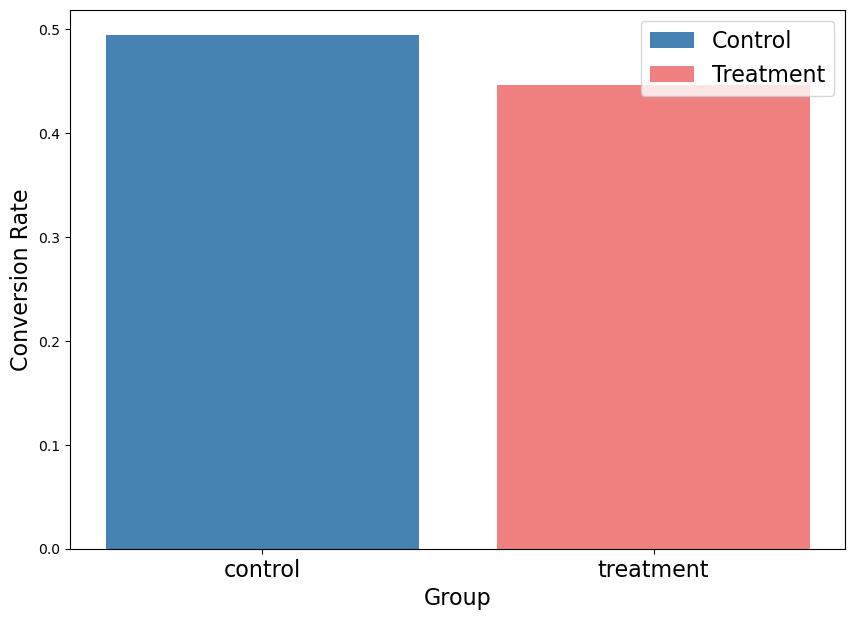

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.bar("control", cr_control, color="steelblue", label="Control")
ax.bar("treatment", cr_treatment, color="lightcoral", label="Treatment")

ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [21]:
from statsmodels.stats.proportion import proportions_ztest

# 定义计数转换和观察总数
count_convert = [n_treatment_convert, n_control_convert]
count_observation = [n_treatment, n_control]

# 计算 z 统计量和 p 值
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = 'larger')
print(f"Z stats : {z_stat:}")
print(f"P-value : {p_value:}")

# 计算 z 临界值
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
print(f"Z critical : {z_critical:}")

Z stats : -1.0730903386873218
P-value : 0.8583847073204088
Z critical : 1.6448536269514722


In [22]:
# 根据 z 检验做出决定
if z_stat > z_critical:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Failed to Reject Null Hypothesis")

Decision : Failed to Reject Null Hypothesis


得到的 p 值为 0.858，大于 α（显著性水平），表明我们无法拒绝 H0。此外，考虑到 -1.073 的 z 统计量与 2.326 的 z 临界值相比，由于 z 统计量小于 z 临界值，我们也无法拒绝 H0，即互动广告的转化率 （CR） 并不显著。因此，我们无法确定互动广告的转化率 优于静态广告的转化率。

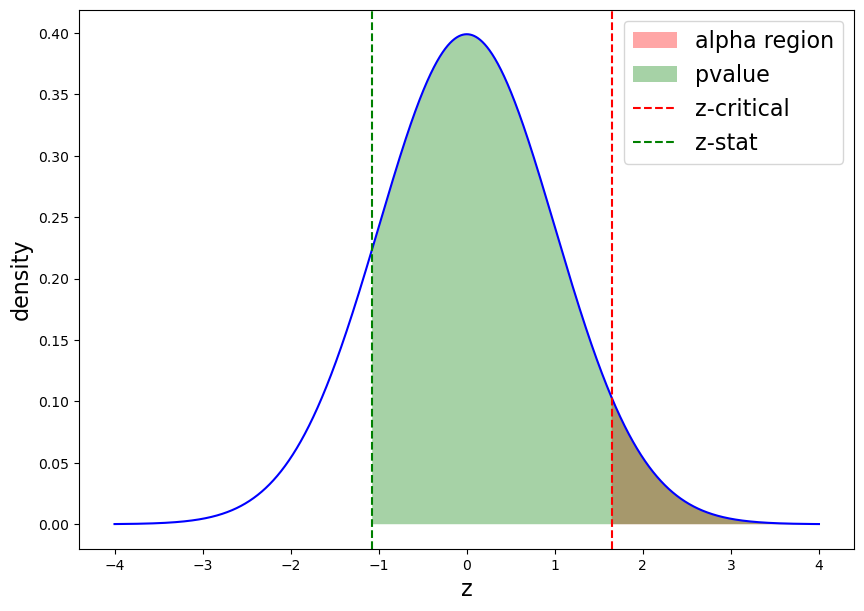

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red", 
                alpha = .35,
                label = "alpha region")


x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green", 
                alpha = .35,
                label = "pvalue")


ax.axvline(z_critical, 
           color = "red",
           linestyle = "--",
           label = "z-critical")

ax.axvline(z_stat, 
           color = "green",
           linestyle = "--",
           label = "z-stat")

ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [24]:
import statsmodels.stats.proportion as smp

# 计算置信区间
confidence_interval = smp.confint_proportions_2indep(count1=n_treatment_convert, nobs1=n_treatment,
                                                     count2=n_control_convert, nobs2=n_control, 
                                                     compare='diff', alpha=0.05)

print(confidence_interval)


(-0.13386823518539348, 0.039266242474423535)


根据置信区间计算，我们有 95% 的把握控制组和对照组之间的转化率差异在 -0.13 和 0.39 之间。引入互动式广告可能会导致转化率下降多达 -0.133 或增加多达 0.039。